## Business Problem :-
### Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

### R&D Spend -- Research and devolop spend in the past few years
### Administration -- spend on administration in the past few years
### Marketing Spend -- spend on Marketing in the past few years
### State -- states from which data is collected
### Profit  -- profit of each state in the past few years
--------------------------------------------------------------------------------------------------------------------------

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

### Import Data

In [2]:
startup_data = pd.read_csv("50_Startups.csv")
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup_data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


### Data Understanding

In [5]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startup_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
startup_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
startup_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

### Note : from above we can tell that the 'State' feature has object data-type, so we need to make it into float or int, so we use pandas.get_dummies to make it into numerical data-type.

In [9]:
startup_data.shape

(50, 5)

### Understanding the target variable

In [10]:
startup_data['Profit'].unique()

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

### Outlier detection 

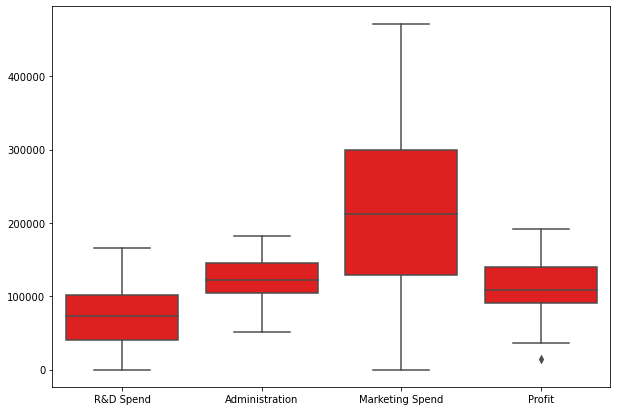

In [11]:
plt.figure(figsize=(10,7))
sns.boxplot(data=startup_data,color='red')
plt.show()

###  While looking at the above boxplots we can see the outliers in the profit (target variable), but the amount of data is not much (just 50 entries) so it won’t create much negative impact.


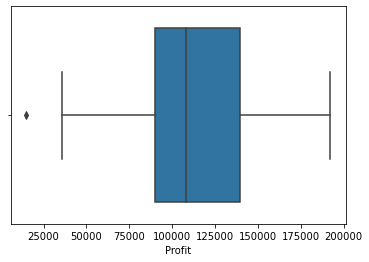

In [12]:
sns.boxplot(startup_data['Profit'])
plt.show()

### Observations :-

### 1. There is an outlier in the Profit column. The value is less than 25,000 which means the company made very less profit once.
### 2. The median line is towards the upper portion of the box which means there is positive skewness in the data.



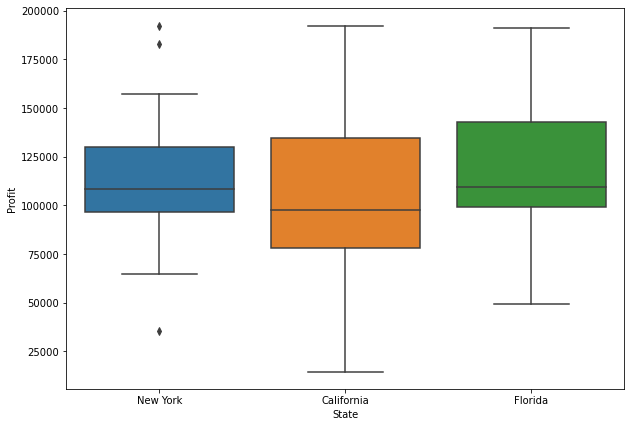

In [13]:
plt.figure(figsize=(10,7))
sns.boxplot(x = 'State', y = 'Profit', data = startup_data) ## State-wise outliers detection ##
plt.show()

### From the above boxplots,we can infer that :-
### 1. All outliers are presented in New York.
### 2. The startups located in California have the maximum profits and maximum loss.
-----------------------------------------------------------------------------------------------------

### Data Visualization of Target Variable : 

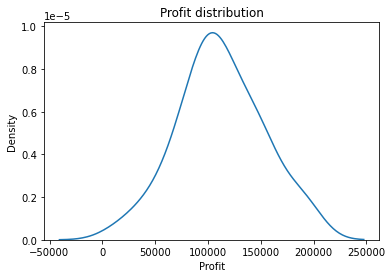

In [14]:
sns.distplot(startup_data['Profit'],bins=5,kde=True, hist = False)
plt.title('Profit distribution')
plt.show()

### From the above distplot we can say that the average profit (which is 100k) is the most frequent
------------------------------------------------------------------------------------------------------------

### Assumptions Check :
----------------------------
### 1) Normality Test :

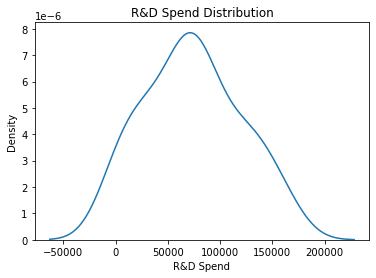

In [15]:
sns.distplot(startup_data['R&D Spend'],bins=5,kde=True,hist=False)
plt.title('R&D Spend Distribution')
plt.show()

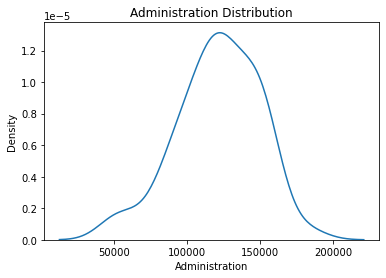

In [16]:
sns.distplot(startup_data['Administration'],bins=5,kde=True,hist=False)
plt.title('Administration Distribution')
plt.show()

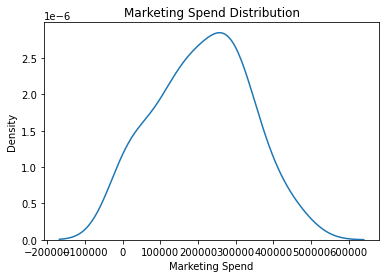

In [17]:
sns.distplot(startup_data['Marketing Spend'],bins=5,kde=True,hist=False)
plt.title('Marketing Spend Distribution')
plt.show()

### 2) Linearity Test : 

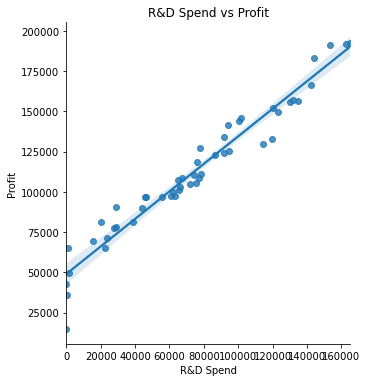

In [18]:
sns.lmplot(x='R&D Spend',y='Profit',data=startup_data)
plt.title('R&D Spend vs Profit')
plt.show()

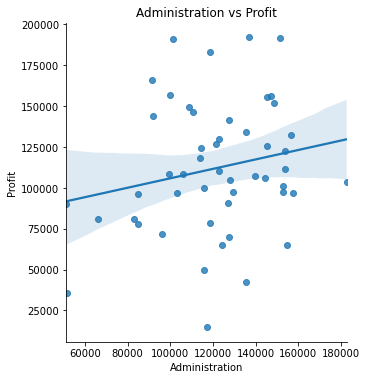

In [19]:
sns.lmplot(x='Administration',y='Profit',data=startup_data)
plt.title('Administration vs Profit')
plt.show()

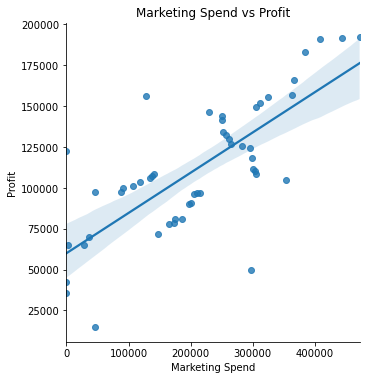

In [20]:
sns.lmplot(x='Marketing Spend',y='Profit',data=startup_data)
plt.title('Marketing Spend vs Profit')
plt.show()

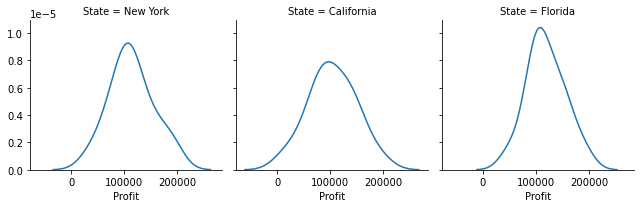

In [21]:
g=sns.FacetGrid(startup_data, col='State') ## spread of profit against different states ##
g=g.map(sns.kdeplot,'Profit')

### 3) No Auto Regression Test - Passed (as there is no date-time feature)

### Data Manipulation :

In [22]:
startup_data = pd.get_dummies(startup_data, columns=['State'])
startup_data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


### 4) No Multicollinearity Test :

###  Correlation Matrix

In [23]:
corr = startup_data.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


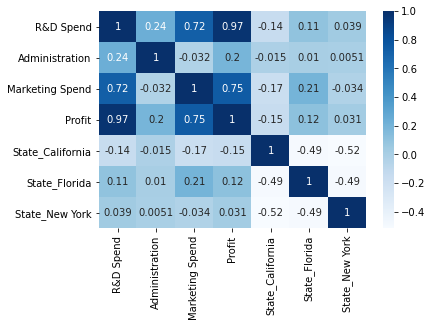

In [24]:
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()

### Pair plot

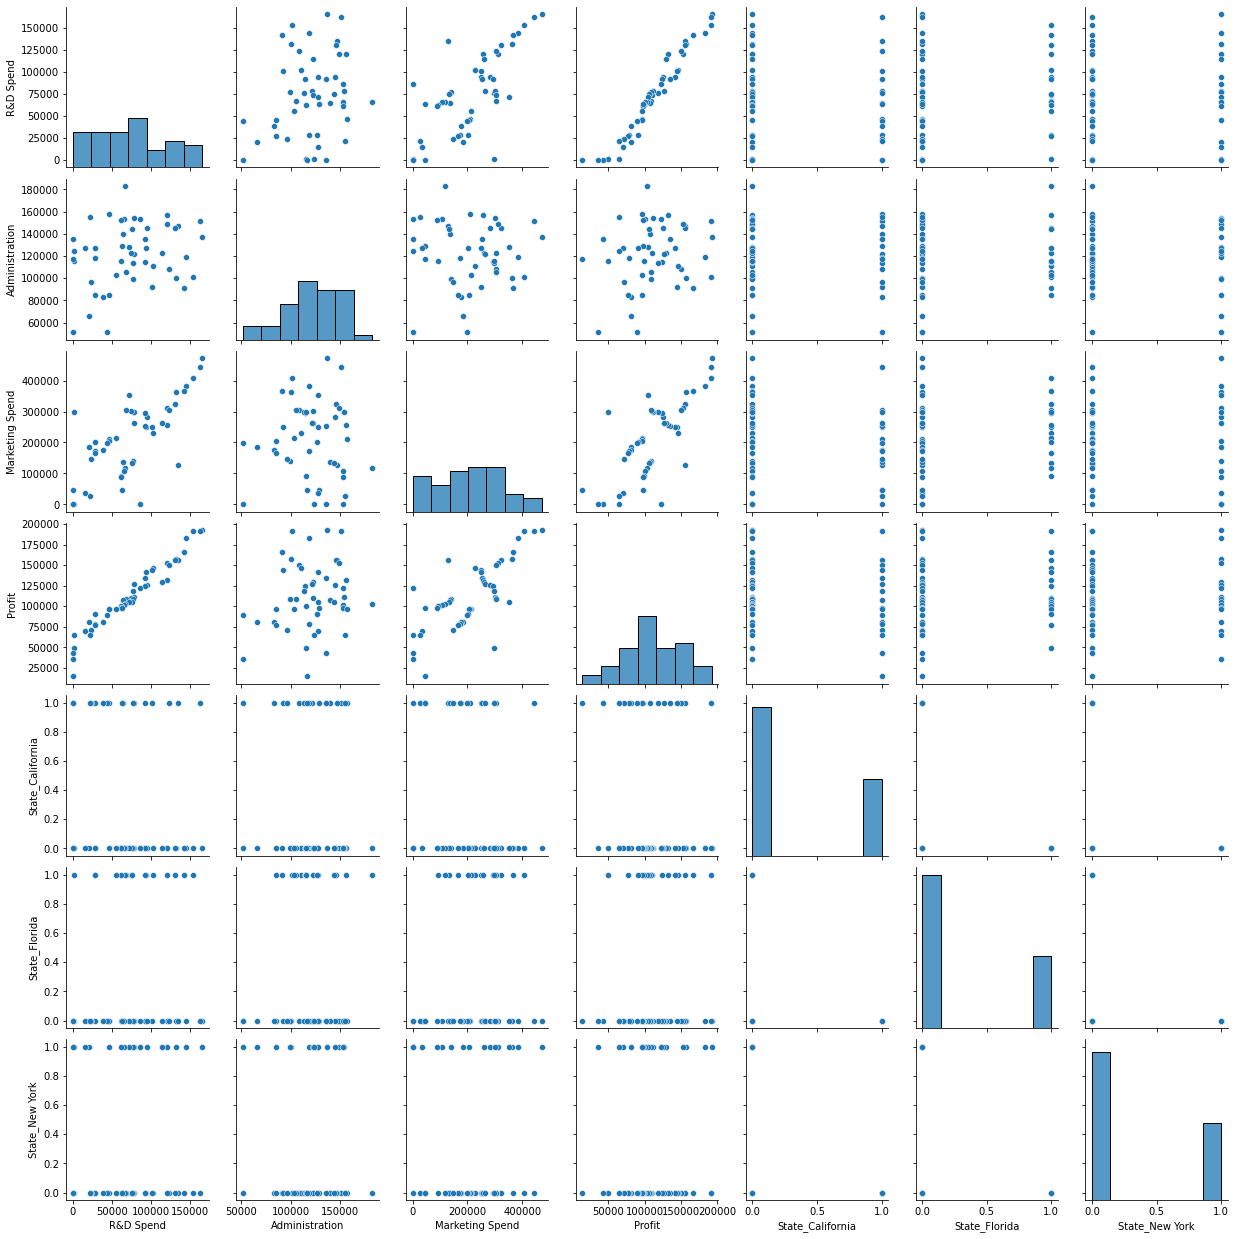

In [25]:
sns.pairplot(startup_data)
plt.show()

### Inference:

### 1. As we can see in the pair pot, R&D Spend is directly proportional to the Marketing Spend.
### 2. The Marketing Spend seems to be directly proportional (though a little bit outliers are there) with the Profit.
### 3. There is no relationship between the Administration and Profit.

In [26]:
startup_data.rename(columns={'Marketing Spend':'Marketing'},inplace=True)

In [27]:
startup_data.rename(columns={'R&D Spend':'RD'},inplace=True)

In [28]:
startup_data.rename(columns={'State_New York':'State_NewYork'},inplace=True)

In [29]:
startup_data.head()

,RD,Administration,Marketing,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


### Model Building using Statsmodel ( OLS )

In [30]:
ols_model = smf.ols('Profit~RD+Administration+Marketing+State_California+State_Florida+State_NewYork',data=startup_data).fit()

In [31]:
ols_model.params

Intercept           37633.233317
RD                      0.806023
Administration         -0.027004
Marketing               0.026980
State_California    12492.110514
State_Florida       12690.899307
State_NewYork       12450.223495
dtype: float64

In [32]:
print('P values of the model:\n ',round(ols_model.pvalues,2))

P values of the model:
  Intercept           0.00
RD                  0.00
Administration      0.61
Marketing           0.12
State_California    0.00
State_Florida       0.00
State_NewYork       0.00
dtype: float64


In [33]:
print("rsquared value is      : ",round(ols_model.rsquared,2))
print("rsquared_adj values is : ",round(ols_model.rsquared_adj,2))
print('AIC Value              : ',round(ols_model.aic,2))
print('BIC Value              : ',round(ols_model.bic,2))

rsquared value is      :  0.95
rsquared_adj values is :  0.95
AIC Value              :  1062.76
BIC Value              :  1074.24


In [34]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           1.34e-27
Time:                        18:38:30   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RD                   0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing            0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_NewYork     1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.40e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.74e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
model_1 = smf.ols(formula = 'Profit ~ RD', data = startup_data).fit()

In [36]:
model_2 = smf.ols(formula = 'Profit ~ RD + Marketing ', data = startup_data).fit()

In [37]:
model_3 = smf.ols(formula = 'Profit ~ RD + Marketing + Administration ', data = startup_data).fit()

In [38]:
model_4 = smf.ols(formula = 'Profit ~ RD + Marketing + Administration + State_California ', data = startup_data).fit()

In [39]:
model_5 = smf.ols(formula = 'Profit ~ RD + Marketing + Administration + State_California + State_Florida ', data = startup_data).fit()

In [40]:
model_6 = smf.ols(formula = 'Profit ~ RD + Marketing + Administration + State_California + State_Florida + State_NewYork ', data = startup_data).fit()

In [41]:
##*To know whether the input feature is significant or not*##

print('P Values of model 1 :\n' ,model_1.pvalues)
print('---------------------------------------------')
print('P Values of model 2 :\n' ,model_2.pvalues)
print('---------------------------------------------')
print('P Values of model 3 :\n' ,model_3.pvalues)
print('---------------------------------------------')
print('P Values of model 4 :\n' ,model_4.pvalues)
print('---------------------------------------------')
print('P Values of model 5 :\n' ,model_5.pvalues)
print('---------------------------------------------')
print('P Values of model 6 :\n' ,model_6.pvalues)


P Values of model 1 :
 Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64
---------------------------------------------
P Values of model 2 :
 Intercept    3.504062e-22
RD           6.040433e-24
Marketing    6.003040e-02
dtype: float64
---------------------------------------------
P Values of model 3 :
 Intercept         1.057379e-09
RD                2.634968e-22
Marketing         1.047168e-01
Administration    6.017551e-01
dtype: float64
---------------------------------------------
P Values of model 4 :
 Intercept           2.819435e-09
RD                  7.594646e-22
Marketing           1.106306e-01
Administration      6.056172e-01
State_California    9.803035e-01
dtype: float64
---------------------------------------------
P Values of model 5 :
 Intercept           5.757175e-09
RD                  2.578772e-21
Marketing           1.226769e-01
Administration      6.077373e-01
State_California    9.897941e-01
State_Florida       9.428623e-01
dtype: float64
---------

## Let us check which model is the best one out of the above 6 models :

### Model 1 Performance

In [42]:
print('R2 Score    : ',round(model_1.rsquared,4)) 
print('Adj.R2 Score: ',round(model_1.rsquared_adj,4))
print('AIC Value   : ',round(model_1.aic,4))
print('BIC Value   : ',round(model_1.bic,4))

R2 Score    :  0.9465
Adj.R2 Score:  0.9454
AIC Value   :  1058.873
BIC Value   :  1062.6971


In [43]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           3.50e-32
Time:                        18:38:31   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 2 Performance

In [44]:
print('R2 Score    : ',round(model_2.rsquared,4))
print('Adj.R2 Score: ',round(model_2.rsquared_adj,4))
print('AIC Value   : ',round(model_2.aic,4))
print('BIC Value   : ',round(model_2.bic,4))

R2 Score    :  0.9505
Adj.R2 Score:  0.9483
AIC Value   :  1057.0708
BIC Value   :  1062.8068


In [45]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           2.16e-31
Time:                        18:38:31   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD             0.7966      0.041     19.266      0.000       0.713       0.880
Marketing      0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 3 Performance

In [46]:
print('R2 Score    : ',round(model_3.rsquared,4))
print('Adj.R2 Score: ',round(model_3.rsquared_adj,4))
print('AIC Value   : ',round(model_3.aic,4))
print('BIC Value   : ',round(model_3.bic,4))

R2 Score    :  0.9507
Adj.R2 Score:  0.9475
AIC Value   :  1058.7715
BIC Value   :  1066.4196


In [47]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           4.53e-30
Time:                        18:38:31   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD                 0.8057      0.045     17.846      0.000       0.715       0.897
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 4 Performance

In [48]:
print('R2 Score    : ',round(model_4.rsquared,4))
print('Adj.R2 Score: ',round(model_4.rsquared_adj,4))
print('AIC Value   : ',round(model_4.aic,4))
print('BIC Value   : ',round(model_4.bic,4))

R2 Score    :  0.9507
Adj.R2 Score:  0.9464
AIC Value   :  1060.7708
BIC Value   :  1070.3309


In [49]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           8.51e-29
Time:                        18:38:32   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.016e+04   6798.992      7.377      0.000    3.65e+04    6.39e+04
RD                   0.8057      0.046     17.646      0.000       0.714       0.898
Marketing            0.0272      0.017      1.627      0.111      -0.006       0.061
Administration      -0.0268      0.052     -0.520      0.606      -0.131       0.077
State_California   -70.2265   2828.752     -0.025      0.980   -5767.625    5627.172
==============================================================================
Omnibus:                       14.785   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.242
Skew:                          -0.949   Prob(JB):                     2.44e-05
Kurtosis:                       5.568   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 5 Performance

In [50]:
print('R2 Score    : ',round(model_5.rsquared,4))
print('Adj.R2 Score: ',round(model_5.rsquared_adj,4))
print('AIC Value   : ',round(model_5.aic,4))
print('BIC Value   : ',round(model_5.bic,4))

R2 Score    :  0.9508
Adj.R2 Score:  0.9452
AIC Value   :  1062.7649
BIC Value   :  1074.237


### Model 6 Performance

In [51]:
print('R2 Score    : ',round(model_6.rsquared,4))
print('Adj.R2 Score: ',round(model_6.rsquared_adj,4))
print('AIC Value   : ',round(model_6.aic,4))
print('BIC Value   : ',round(model_6.bic,4))

R2 Score    :  0.9508
Adj.R2 Score:  0.9452
AIC Value   :  1062.7649
BIC Value   :  1074.237


### Model 4,5 and 6 gives the same performance scores
-------------------------------------------------------------
### Also, from the above performance calculations of each model, we got to know that 'Model 2' gives the best performance as it has best r2 score, adj r2 score, aic and bic values compared to other models.
-------------------------------------------------------------

### Finding Variance Inflation Factor (VIF)

In [52]:
rsq_rd = smf.ols('RD~Administration+Marketing+State_California+State_Florida+State_NewYork',data=startup_data).fit().rsquared  
vif_rd = 1/(1-rsq_rd)

rsq_ad = smf.ols('Administration~RD+Marketing+State_California+State_Florida+State_NewYork',data=startup_data).fit().rsquared  
vif_ad = 1/(1-rsq_ad)

rsq_mkt = smf.ols('Marketing~RD+Administration+State_California+State_Florida+State_NewYork',data=startup_data).fit().rsquared  
vif_mkt = 1/(1-rsq_mkt) 

rsq_sc = smf.ols('State_California~RD+Administration+Marketing+State_Florida+State_NewYork',data=startup_data).fit().rsquared  
vif_sc = 1/(1-rsq_sc)

rsq_sf = smf.ols('State_Florida~RD+Administration+Marketing+State_California+State_NewYork',data=startup_data).fit().rsquared  
vif_sf = 1/(1-rsq_sf)

rsq_sny = smf.ols('State_NewYork~RD+Administration+Marketing+State_California+State_Florida',data=startup_data).fit().rsquared  
vif_sny = 1/(1-rsq_sny)


# Storing vif values in a data frame
d1 = {'Features':['RD','Administration','Marketing','State_California','State_Florida','State_NewYork'],'VIF':[vif_rd,vif_ad,vif_mkt,vif_sc,vif_sf,vif_sny]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Features,VIF
0,RD,2.495511
1,Administration,1.177766
2,Marketing,2.416797
3,State_California,inf
4,State_Florida,inf
5,State_NewYork,inf


### Here, VIF value is infinite for the State variables, so we can confirm collinearlity does not exist between them. From the above Simple Regression models and VIF values we can say that the States and Administration are not significant variables for predicting the Profit values. We will build a model using R&D Spend and Marketing Spend.

### Also, as expected, Administration has the lowest variance inflation factor We would need to discard this variables to improve model and try to solve multicolinearity.


---------------------------------------------------------------------------
### Simple Linear Regression between Profit and R&D Spend, Marketing Spend features :

In [53]:
linear_model = smf.ols('Profit~RD+Marketing',data=startup_data).fit()

In [54]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           2.16e-31
Time:                        18:38:32   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD             0.7966      0.041     19.266      0.000       0.713       0.880
Marketing      0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
print('rsquared for value R&D,Marketing and Profit Model         : ',round(linear_model.rsquared,2))
print('adjusted rsquared for value R&D,Marketing and Profit Model: ',round(linear_model.rsquared_adj,2))
print('aic value for R&D,Marketing and Profit Model              : ',round(linear_model.aic,2))
print('bic value for R&D,Marketing and Profit Model              : ',round(linear_model.bic,2))

rsquared for value R&D,Marketing and Profit Model         :  0.95
adjusted rsquared for value R&D,Marketing and Profit Model:  0.95
aic value for R&D,Marketing and Profit Model              :  1057.07
bic value for R&D,Marketing and Profit Model              :  1062.81


### On comparing the R squared, Adjusted R squared, AIC and BIC values for Marketing and R & D Spend, we can see that R square value is more and AIC value is less for R&D Spend . So R&D Spend or Marketing variable is enough to predict the Profit value.
### So let us predict the model with R&D Spend only.

In [56]:
lr_model_rd = smf.ols('Profit~RD',data=startup_data).fit()

In [57]:
print('rsquared value of R&D and profit     : ',round(lr_model_rd.rsquared,2))
print('rsquared adj value of R&D and profit : ',round(lr_model_rd.rsquared_adj,2))
print('aic value for R&D and Profit Model   : ',round(lr_model_rd.aic,2))
print('bic value for R&D and Profit Model   : ',round(lr_model_rd.bic,2))

rsquared value of R&D and profit     :  0.95
rsquared adj value of R&D and profit :  0.95
aic value for R&D and Profit Model   :  1058.87
bic value for R&D and Profit Model   :  1062.7


### Solving Outlier Problem :-
### Finding Cook's Distance

In [58]:
model_influence = ols_model.get_influence()

In [59]:
summary_df = model_influence.summary_frame()

In [60]:
summary_df.sort_values('cooks_d', ascending=False)

,dfb_Intercept,dfb_RD,dfb_Administration,dfb_Marketing,dfb_State_California,dfb_State_Florida,dfb_State_NewYork,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
49,-0.359185,0.578956,-0.114232,0.080954,-0.846858,0.013508,0.086642,0.226251,-3.744509,0.101490,-1.258474,-4.484594,-1.507205
48,-0.878344,-0.112734,0.701599,0.418630,-0.383751,-0.498192,-0.867881,0.134037,-1.651796,0.255887,-0.968637,-1.686029,-0.988712
45,0.183770,-0.212843,0.091394,-0.189969,-0.112537,0.032671,0.450050,0.080910,1.966666,0.127729,0.752575,2.035721,0.779000
14,0.216056,-0.221204,-0.257240,0.142195,0.304089,-0.171372,0.329200,0.061729,-1.914478,0.105459,-0.657343,-1.976719,-0.678713
36,-0.048556,-0.379353,0.189523,0.218405,-0.201680,0.231766,-0.154536,0.050783,1.714446,0.107892,0.596224,1.754467,0.610141
38,0.371582,-0.189819,-0.313449,0.109261,0.130320,0.130630,0.486583,0.047830,1.341034,0.156954,0.578628,1.353659,0.584076
15,-0.047266,-0.208289,0.066627,0.071114,0.090646,0.108128,-0.304342,0.037213,-1.787748,0.075363,-0.510387,-1.835225,-0.523941
46,0.080571,0.434369,-0.142646,-0.364064,0.133359,-0.058792,0.097490,0.036277,-0.838336,0.265420,-0.503925,-0.835454,-0.502192
19,0.045191,0.252210,0.039342,-0.342025,-0.066917,0.009442,0.147794,0.028192,0.857080,0.211760,0.444236,0.854447,0.442872
27,0.150057,0.271462,-0.146112,-0.339679,0.166759,0.216799,-0.095857,0.027860,-1.063541,0.147057,-0.441609,-1.065166,-0.442284


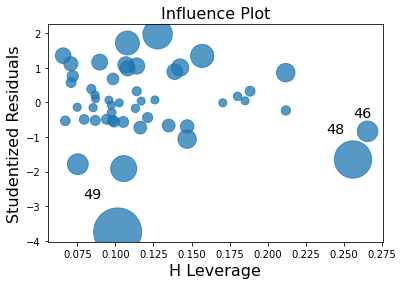

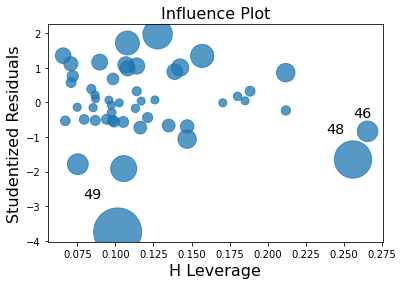

In [61]:
model_influence.plot_influence()

### As we know that index 48 and 49 has highest Cook's Distance

### Thus it will be wise to drop these rows from the data set


In [62]:
startup = startup_data.drop(startup_data.index[[48,49]],axis=0).reset_index()

In [63]:
startup

,index,RD,Administration,Marketing,Profit,State_California,State_Florida,State_NewYork
0,0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [64]:
startup.shape

(48, 8)

In [65]:
startup = startup.drop('Administration',axis=1)

In [66]:
startup.head()

,index,RD,Marketing,Profit,State_California,State_Florida,State_NewYork
0,0,165349.20,471784.10,192261.83,0,0,1
1,1,162597.70,443898.53,191792.06,1,0,0
2,2,153441.51,407934.54,191050.39,0,1,0
3,3,144372.41,383199.62,182901.99,0,0,1
4,4,142107.34,366168.42,166187.94,0,1,0


In [67]:
startup.shape

(48, 7)

### Final Model

In [68]:
final_model= smf.ols('Profit~RD',data = startup).fit()

In [69]:
print('rsquared value for Final Model     : ',round(final_model.rsquared,2))
print('rsquared adj value for Final Model : ',round(final_model.rsquared_adj,2))
print('aic value for Final Model          : ',round(final_model.aic,2))
print('bic value for Final Model          : ',round(final_model.bic,2))

rsquared value for Final Model     :  0.96
rsquared adj value for Final Model :  0.96
aic value for Final Model          :  996.59
bic value for Final Model          :  1000.33


In [70]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     1043.
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           2.91e-33
Time:                        18:38:36   Log-Likelihood:                -496.29
No. Observations:                  48   AIC:                             996.6
Df Residuals:                      46   BIC:                             1000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.312e+04   2227.718     23.844      0.000    4.86e+04    5.76e+04
RD             0.8142      0.025     32.303      0.000       0.763       0.865
==============================================================================
Omnibus:                        0.068   Durbin-Watson:                   1.459
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.265
Skew:                           0.031   Prob(JB):                        0.876
Kurtosis:                       2.642   Cond. No.                     1.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Evaluation

In [71]:
# say New data for prediction is
new_data=pd.DataFrame({'RD':90000,"Administration":250000,"Marketing":180000},index=[1])
new_data

,RD,Administration,Marketing
1,90000,250000,180000


In [72]:
# Manual Prediction of Profit
final_model.predict(new_data)

1    126392.415401
dtype: float64

In [73]:
# Automatic Prediction of Profit
pred_y = final_model.predict(startup)
pred_y

0     187739.409084
1     185499.222684
2     178044.535307
3     170660.753921
4     168816.603818
5     160487.295238
6     162716.946289
7     159201.909418
8     151259.192772
9     153532.646124
10    136091.677550
11    135081.195942
12    129538.161432
13    128014.557862
14    150771.277488
15    146358.781968
16    116633.059428
17    130184.131373
18    127816.527501
19    123477.445614
20    115200.732361
21    116939.480127
22    113361.280013
23    108100.094578
24    115844.048110
25    105765.204023
26    114447.634044
27    111824.975405
28    106894.301934
29    106531.149928
30    103591.185149
31    102892.546606
32    104742.729703
33     98298.654201
34     90915.866102
35     90580.387706
36     76454.341369
37     88997.585898
38     69587.500398
39     84510.341509
40     76528.080669
41     75826.747226
42     72364.908166
43     65741.479344
44     71173.624016
45     53931.548822
46     54188.199362
47     53117.192419
dtype: float64

### Standardization of the variables 

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
ss = StandardScaler()

In [76]:
startup_scaled = ss.fit_transform(startup)

In [77]:
startup_scaled = pd.DataFrame(startup_scaled,columns = startup.columns)

In [78]:
startup_scaled

,index,RD,Marketing,Profit,State_California,State_Florida,State_NewYork
0,-1.696335,2.022971,2.160416,2.103970,-0.707107,-0.707107,1.414214
1,-1.624150,1.960123,1.922208,2.091072,1.414214,-0.707107,-0.707107
2,-1.551966,1.750986,1.614992,2.070709,-0.707107,1.414214,-0.707107
3,-1.479781,1.543838,1.403699,1.846988,-0.707107,-0.707107,1.414214
4,-1.407597,1.492101,1.258213,1.388089,-0.707107,1.414214,-0.707107
5,-1.335412,1.258427,1.229963,1.135583,-0.707107,-0.707107,1.414214
6,-1.263228,1.320978,-0.778717,1.111735,1.414214,-0.707107,-0.707107
7,-1.191043,1.222366,0.896943,1.101578,-0.707107,1.414214,-0.707107
8,-1.118859,0.999537,0.792186,1.004362,-0.707107,-0.707107,1.414214
9,-1.046675,1.063318,0.735536,0.937045,1.414214,-0.707107,-0.707107


### Model Building using Sklearn

In [79]:
X = startup_scaled.drop('Profit',axis=1)
y = startup_scaled[['Profit']]

In [80]:
X.head(5)

,index,RD,Marketing,State_California,State_Florida,State_NewYork
0,-1.696335,2.022971,2.160416,-0.707107,-0.707107,1.414214
1,-1.624150,1.960123,1.922208,1.414214,-0.707107,-0.707107
2,-1.551966,1.750986,1.614992,-0.707107,1.414214,-0.707107
3,-1.479781,1.543838,1.403699,-0.707107,-0.707107,1.414214
4,-1.407597,1.492101,1.258213,-0.707107,1.414214,-0.707107


In [81]:
y.head(5)

,Profit
0,2.103970
1,2.091072
2,2.070709
3,1.846988
4,1.388089


In [82]:
X.shape,y.shape

((48, 6), (48, 1))

In [83]:
from sklearn.model_selection import train_test_split 

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12121)

In [85]:
X_train.shape,y_train.shape

((38, 6), (38, 1))

In [86]:
X_test.shape,y_test.shape

((10, 6), (10, 1))

### Model Training

In [87]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [88]:
print(" Intercept value of Model is : " ,linear_reg.intercept_)
print("Coefficient value of Model is: " , linear_reg.coef_)

 Intercept value of Model is :  [0.0163818]
Coefficient value of Model is:  [[-0.42550368  0.55559107  0.05056278  0.00289504  0.01313049 -0.01602553]]


### Model Testing || Model Evaluation 

### Training data

In [89]:
y_pred_train = linear_reg.predict(X_train)
y_pred_train

array([[ 1.53579017],
       [ 1.09584743],
       [ 0.14836957],
       [ 1.89982423],
       [-0.95757581],
       [-1.57074782],
       [-0.95800126],
       [-0.81668911],
       [ 0.62760088],
       [ 1.54075628],
       [ 1.2545809 ],
       [-0.48289495],
       [-0.51953919],
       [ 0.28814546],
       [-0.27366144],
       [ 0.72296028],
       [ 0.78224734],
       [ 1.75909355],
       [-1.38237447],
       [ 0.43638546],
       [ 0.11449754],
       [-0.50295704],
       [ 1.9373642 ],
       [-0.21227058],
       [ 1.31197032],
       [-0.12642502],
       [-1.11366044],
       [-1.19516328],
       [-1.25068991],
       [ 0.15778396],
       [-1.73339104],
       [ 0.74094317],
       [-0.68869814],
       [-0.37664123],
       [ 0.55264574],
       [-1.76819953],
       [-0.39824529],
       [ 0.09140641]])

### Calculation of Error rates of the training model 

In [90]:
print('Mean Absolute Error    :', round(mean_absolute_error(y_train, y_pred_train),2)) 
print('Mean Squared Error     :', round(mean_squared_error(y_train, y_pred_train),2))  
print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error(y_train, y_pred_train)),2))
print("R^2 Score              :", round(r2_score(y_train, y_pred_train),2))

Mean Absolute Error    : 0.13
Mean Squared Error     : 0.03
Root Mean Squared Error: 0.17
R^2 Score              : 0.97


In [91]:
error= y_train - y_pred_train
error

,Profit
4,-0.147701
9,-0.158802
19,0.047832
1,0.191248
39,0.006917
46,-0.245182
36,0.273731
37,0.111578
12,0.085008
3,0.306232


### Test data :

In [92]:
y_pred_test = linear_reg.predict(X_test)
y_pred_test

array([[ 0.90001061],
       [-0.06346702],
       [-1.13718984],
       [-0.08763112],
       [ 1.2755166 ],
       [ 1.05385404],
       [-0.02068744],
       [ 0.43594875],
       [-1.47335658],
       [-0.7670591 ]])

### Calculation of the Error rate of the testing model :

In [93]:
print('Mean Absolute Error    :', round(mean_absolute_error(y_test, y_pred_test),2))
print('Mean Squared Error     :', round(mean_squared_error(y_test, y_pred_test),2))  
print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error(y_test, y_pred_test)),2))
print("R^2 Score              :", round(r2_score(y_test, y_pred_test),2))

Mean Absolute Error    : 0.19
Mean Squared Error     : 0.05
Root Mean Squared Error: 0.21
R^2 Score              : 0.92


In [94]:
error= y_test - y_pred_test
error

,Profit
14,-0.434033
24,-0.130886
41,0.098482
26,-0.184106
7,-0.173938
8,-0.049492
23,-0.168670
18,-0.198837
43,0.213908
35,0.241245


### Square Root Tranformation 
-----------------------------------
### Using Statsmodels for Model building

In [95]:
startup_copy = startup.copy()
startup_copy

,index,RD,Marketing,Profit,State_California,State_Florida,State_NewYork
0,0,165349.20,471784.10,192261.83,0,0,1
1,1,162597.70,443898.53,191792.06,1,0,0
2,2,153441.51,407934.54,191050.39,0,1,0
3,3,144372.41,383199.62,182901.99,0,0,1
4,4,142107.34,366168.42,166187.94,0,1,0
5,5,131876.90,362861.36,156991.12,0,0,1
6,6,134615.46,127716.82,156122.51,1,0,0
7,7,130298.13,323876.68,155752.60,0,1,0
8,8,120542.52,311613.29,152211.77,0,0,1
9,9,123334.88,304981.62,149759.96,1,0,0


In [96]:
startup_copy['sqrt_RD']  = np.sqrt(startup_copy['RD'])
startup_copy['sqrt_Marketing'] = np.sqrt(startup_copy['Marketing'])
startup_copy.head()

,index,RD,Marketing,Profit,State_California,State_Florida,State_NewYork,sqrt_RD,sqrt_Marketing
0,0,165349.20,471784.10,192261.83,0,0,1,406.631529,686.865416
1,1,162597.70,443898.53,191792.06,1,0,0,403.234051,666.257105
2,2,153441.51,407934.54,191050.39,0,1,0,391.716109,638.697534
3,3,144372.41,383199.62,182901.99,0,0,1,379.963696,619.031195
4,4,142107.34,366168.42,166187.94,0,1,0,376.971272,605.118517


In [97]:
sqrt_model_1 = smf.ols(formula = 'Profit ~ sqrt_RD', data = startup_copy).fit()

In [98]:
sqrt_model_2 = smf.ols(formula = 'Profit ~ sqrt_RD + sqrt_Marketing ', data = startup_copy).fit()

### Sqrt Model 1 Performance 

In [99]:
print('R2 Score    : ',round(sqrt_model_1.rsquared,4))
print('Adj.R2 Score: ',round(sqrt_model_1.rsquared_adj,4))
print('AIC Value   : ',round(sqrt_model_1.aic,4))
print('BIC Value   : ',round(sqrt_model_1.bic,4))

R2 Score    :  0.8826
Adj.R2 Score:  0.88
AIC Value   :  1045.6898
BIC Value   :  1049.4322


### Sqrt Model 2 Performance

In [100]:
print('R2 Score    : ',round(sqrt_model_2.rsquared,4))
print('Adj.R2 Score: ',round(sqrt_model_2.rsquared_adj,4))
print('AIC Value   : ',round(sqrt_model_2.aic,4))
print('BIC Value   : ',round(sqrt_model_2.bic,4))

R2 Score    :  0.8865
Adj.R2 Score:  0.8815
AIC Value   :  1046.0549
BIC Value   :  1051.6685


### Using Sklearn library for Model Building 

In [101]:
startup_data_copy = startup_data.copy()
startup_data_copy

,RD,Administration,Marketing,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [102]:
startup_data_copy['sqrt_RD']  = np.sqrt(startup_data_copy['RD'])
startup_data_copy['sqrt_Marketing'] = np.sqrt(startup_data_copy['Marketing'])
startup_data_copy.head()

,RD,Administration,Marketing,Profit,State_California,State_Florida,State_NewYork,sqrt_RD,sqrt_Marketing
0,165349.20,136897.80,471784.10,192261.83,0,0,1,406.631529,686.865416
1,162597.70,151377.59,443898.53,191792.06,1,0,0,403.234051,666.257105
2,153441.51,101145.55,407934.54,191050.39,0,1,0,391.716109,638.697534
3,144372.41,118671.85,383199.62,182901.99,0,0,1,379.963696,619.031195
4,142107.34,91391.77,366168.42,166187.94,0,1,0,376.971272,605.118517


In [103]:
X = startup_copy.iloc[:,7:9]
y = startup_copy[['Profit']]

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12121)

In [105]:
X_train.shape , y_train.shape

((38, 2), (38, 1))

In [106]:
X_test.shape, y_test.shape

((10, 2), (10, 1))

### Model training 

In [107]:
lr_model = LinearRegression()

In [108]:
lr_model.fit(X_train,y_train)

LinearRegression()

### Model Testing and Model Evaluation for training data :

In [109]:
y_predicted_train = lr_model.predict(X_train)

In [110]:
print('Mean Absolute Error    :', round(mean_absolute_error(y_train, y_predicted_train),2)) 
print('Mean Squared Error     :', round(mean_squared_error(y_train, y_predicted_train),2))  
print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error(y_train, y_predicted_train)),2))
print("R^2 Score              :", round(r2_score(y_train, y_predicted_train),2))

Mean Absolute Error    : 10721.3
Mean Squared Error     : 168781275.1
Root Mean Squared Error: 12991.58
R^2 Score              : 0.89


In [111]:
error = y_train - y_predicted_train
error

,Profit
4,5919.125120
9,-630.655402
19,2321.202623
1,21326.152434
39,-13441.930597
46,8003.481628
36,5051.407577
37,-9654.503785
12,7640.338188
3,21343.351813


### Model Testing and Model Evaluation for testing data :

In [112]:
y_predicted_test = lr_model.predict(X_test)

In [113]:
print('Mean Absolute Error    :', round(mean_absolute_error(y_test, y_predicted_test),2))
print('Mean Squared Error     :', round(mean_squared_error(y_test, y_predicted_test),2))  
print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error(y_test, y_predicted_test)),2))
print("R^2 Score              :", round(r2_score(y_test, y_predicted_test),2))

Mean Absolute Error    : 8280.42
Mean Squared Error     : 90551838.83
Root Mean Squared Error: 9515.87
R^2 Score              : 0.88


In [114]:
error = y_test - y_predicted_test
error

,Profit
14,-15265.268669
24,-13143.801211
41,-6275.711914
26,-14727.001580
7,1674.486630
8,3092.142680
23,-10111.734889
18,-9275.731463
43,4357.901771
35,-4880.407625


### R2 Scores of each model 

In [115]:
print('rsquared value for Ols Model                                 : ',round(ols_model.rsquared,2))
print('rsquared value for Linear Regression Model                   : ',round(linear_model.rsquared,2))
print('rsquared value for linear Model with RD                      : ',round(lr_model_rd.rsquared,2))
print('rsquared value for Final Model                               : ',round(final_model.rsquared,2))
print('R^2 value for Linear Regression Model with sklearn library   : ',round(r2_score(y_test, y_predicted_test),2))
print('rsquared value for Sqrt Model 1                              : ',round(sqrt_model_1.rsquared,2))
print('rsquared value for Sqrt Model 2                              : ',round(sqrt_model_2.rsquared,2))
print('R^2 value for LR Model with sqrt transformation              : ',round(r2_score(y_test, y_predicted_test),2))

rsquared value for Ols Model                                 :  0.95
rsquared value for Linear Regression Model                   :  0.95
rsquared value for linear Model with RD                      :  0.95
rsquared value for Final Model                               :  0.96
R^2 value for Linear Regression Model with sklearn library   :  0.88
rsquared value for Sqrt Model 1                              :  0.88
rsquared value for Sqrt Model 2                              :  0.89
R^2 value for LR Model with sqrt transformation              :  0.88


### Creation of R2 Scores Table :-

In [116]:
r2_scores_data = {'Prepared_Models': ['OLS_Model','Linear_Model','LR_Model_RD','Final_Model','Linear Regression Model','Sqrt_Model_1','Sqrt_Model_2','LR_Model_Sqrt'],
        'R2_Scores': [round(ols_model.rsquared,2), round(linear_model.rsquared,2), round(lr_model_rd.rsquared,2),round(final_model.rsquared,2), round(r2_score(y_test, y_pred_test)) , round(sqrt_model_1.rsquared,2), round(sqrt_model_2.rsquared,2), round(r2_score(y_test,y_predicted_test),2)] }

In [117]:
r2_scores_table = pd.DataFrame(r2_scores_data)

In [118]:
r2_scores_table

,Prepared_Models,R2_Scores
0,OLS_Model,0.95
1,Linear_Model,0.95
2,LR_Model_RD,0.95
3,Final_Model,0.96
4,Linear Regression Model,-17.00
5,Sqrt_Model_1,0.88
6,Sqrt_Model_2,0.89
7,LR_Model_Sqrt,0.88


### From above R2 Scores table, we can see that 'Final_Model' with statsmodels has the best R2 Score and 'Linear Regression Model' with sklearn library has the least R2 score out of all the models.

## *So we can go ahead with the statsmodels prediction for r2 score !!!

-------------------------------------------------------------------------------------------------------------------------
### Data Visualization of the input and the target variables after getting the predictions :
### without scaled data :

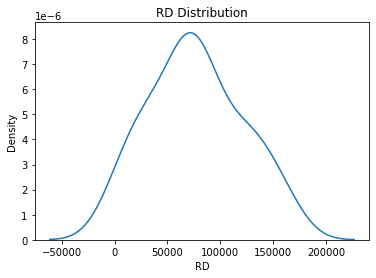

In [119]:
sns.distplot(startup['RD'],bins=5,kde=True,hist=False)
plt.title('RD Distribution')
plt.show()

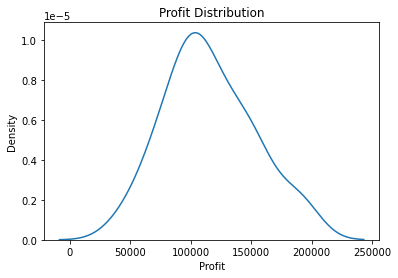

In [120]:
sns.distplot(startup['Profit'],bins=5,kde=True,hist=False)
plt.title('Profit Distribution')
plt.show()

### with scaled data :

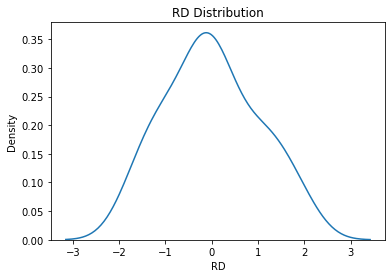

In [121]:
sns.distplot(startup_scaled['RD'],bins=5,kde=True,hist=False)
plt.title('RD Distribution')
plt.show()

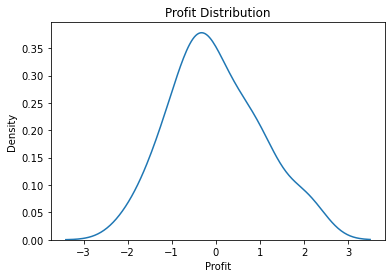

In [122]:
sns.distplot(startup_scaled['Profit'],bins=5,kde=True,hist=False)
plt.title('Profit Distribution')
plt.show()

### Homoscedasticity Test :

In [123]:
## All input features vs the error = Homoscedasticity Test ##
## SCATTER PLOT ##

In [124]:
from sklearn.preprocessing import StandardScaler
std_s = StandardScaler()
std_s = std_s.fit_transform(X)
std_s

array([[ 1.54552645,  1.54408344],
       [ 1.509605  ,  1.41540391],
       [ 1.38782606,  1.2433203 ],
       [ 1.26356807,  1.1205225 ],
       [ 1.23192925,  1.0336509 ],
       [ 1.08578238,  1.01654986],
       [ 1.12544376, -0.51327508],
       [ 1.06273044,  0.80875938],
       [ 0.91707728,  0.74083457],
       [ 0.95935144,  0.70354552],
       [ 0.62151968,  0.24433345],
       [ 0.60090416,  0.37568913],
       [ 0.48548389,  0.37628187],
       [ 0.45303075,  0.39388046],
       [ 0.90794104,  0.41769018],
       [ 0.82425747,  0.44996996],
       [ 0.19934062,  0.46561275],
       [ 0.49914548,  0.57445446],
       [ 0.44878851,  0.64618488],
       [ 0.35438282, -2.74474539],
       [ 0.16585329,  0.66764605],
       [ 0.20645544,  0.67376931],
       [ 0.12227567,  0.6941349 ],
       [-0.00617746,  0.70234178],
       [ 0.18094107, -0.4036408 ],
       [-0.06514983, -0.42549424],
       [ 0.14809111, -0.45861716],
       [ 0.08536723,  0.96605384],
       [-0.03647237,

In [125]:
X_scaled = pd.DataFrame(std_s,columns=X.columns)
X_scaled

,sqrt_RD,sqrt_Marketing
0,1.545526,1.544083
1,1.509605,1.415404
2,1.387826,1.243320
3,1.263568,1.120522
4,1.231929,1.033651
5,1.085782,1.016550
6,1.125444,-0.513275
7,1.062730,0.808759
8,0.917077,0.740835
9,0.959351,0.703546


In [126]:
from sklearn.linear_model import LinearRegression
test_model = LinearRegression() 
test_model.fit(X,y)

LinearRegression()

In [127]:
test_model.coef_

array([[341.90389976,  18.46833443]])

In [128]:
test_model.intercept_ 

array([18462.11345327])

In [129]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression() 
linear_model.fit(X_scaled,y)

LinearRegression()

In [130]:
test_model.coef_

array([[341.90389976,  18.46833443]])

In [131]:
test_model.intercept_ 

array([18462.11345327])

In [132]:
y_predicted = test_model.predict(X_scaled)
y_predicted

array([[19019.05162152],
       [19004.39344141],
       [18959.57865137],
       [18914.82648878],
       [18902.4046779 ],
       [18852.1206647 ],
       [18837.42772852],
       [18840.40157312],
       [18789.34773229],
       [18803.11276701],
       [18679.12588815],
       [18674.50328028],
       [18635.05158821],
       [18624.28075107],
       [18780.25607606],
       [18752.24049094],
       [18538.86787924],
       [18643.38245546],
       [18627.48995329],
       [18532.5874455 ],
       [18531.14965172],
       [18545.14476982],
       [18516.73949877],
       [18472.97243732],
       [18516.52333701],
       [18431.98030398],
       [18504.2764846 ],
       [18509.14224862],
       [18438.5902226 ],
       [18433.55598242],
       [18404.77990035],
       [18397.9680872 ],
       [18404.93318288],
       [18374.89720848],
       [18301.74111125],
       [18297.6095892 ],
       [18133.63453801],
       [18279.96093034],
       [18033.68608993],
       [18227.97695888],


### 7. Model Evaluation

In [133]:
error = y - y_predicted
error

,Profit
0,173242.778378
1,172787.666559
2,172090.811349
3,163987.163511
4,147285.535322
5,138138.999335
6,137285.082271
7,136912.198427
8,133422.422268
9,130956.847233


In [134]:
## All input features vs the error = Homoscedasticity Test  ##
## SCATTER PLOT ##

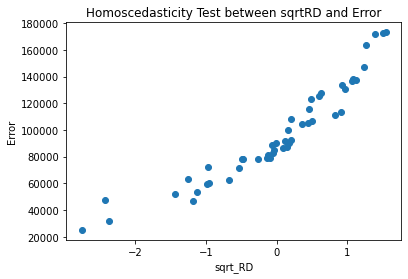

In [135]:
plt.scatter(x = X_scaled['sqrt_RD']  , y = error)
plt.xlabel('sqrt_RD')
plt.ylabel('Error')
plt.title('Homoscedasticity Test between sqrtRD and Error')
plt.show()

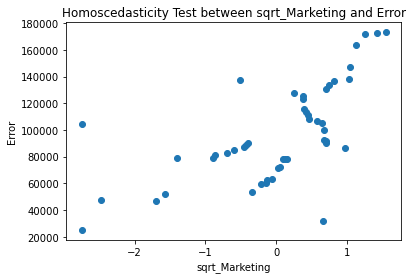

In [136]:
plt.scatter(x = X_scaled['sqrt_Marketing']  , y = error)
plt.xlabel('sqrt_Marketing')
plt.ylabel('Error')
plt.title('Homoscedasticity Test between sqrt_Marketing and Error')
plt.show()

### Zero Residual Mean Test :

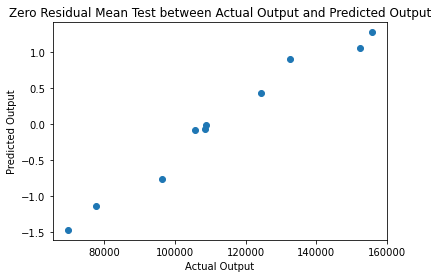

In [137]:
#This test is always between actual output and the predicted output :
plt.scatter(x = y_test , y = y_pred_test)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Zero Residual Mean Test between Actual Output and Predicted Output')
plt.show()